In [109]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [110]:
weather = pd.read_csv('04_weekly_weather.csv')
# Convert our report_date columns to datetime datatype
weather['date'] = pd.to_datetime(weather['date'], format="%Y-%m-%d")

# create new year and month column from datetime
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month

In [111]:
zika = pd.read_csv('zikavirus.csv')

# filter out those rows which does not contain any data
zika = zika.dropna(how = 'all')
  
# Filter all rows for which the report_date is equal to 18437
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)

# covert string to an float
zika['cases'] = zika['cases'].astype(float)

# Replace nan value with 0,
zika['cases'] = zika['cases'].fillna(0)

# covert float to an int
zika['cases'] = zika['cases'].astype(int)

# Convert our report_date columns to datetime datatype
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")

# create new year and month column from datetime
zika['year'] = pd.DatetimeIndex(zika['report_date']).year
zika['month'] = pd.DatetimeIndex(zika['report_date']).month

# 1 Nicaragua



In [135]:
nica_zika = zika[zika["location"].str.startswith("Nicaragua")]
nica_zika.head()

,report_date,location,location_type,data_field,cases,year,month
226671,2016-02-09,Nicaragua,country,total_zika_new_suspected,5,2016.0,2.0
226672,2016-02-09,Nicaragua,country,total_zika_confirmed,3,2016.0,2.0
226673,2016-02-09,Nicaragua-Nueva_Segovia-Ocotal,municipality,total_zika_confirmed,1,2016.0,2.0
226674,2016-02-09,Nicaragua-Managua-Distrito_II,district,total_zika_confirmed,2,2016.0,2.0
226675,2016-02-09,Nicaragua,country,total_zika_confirmed_cumulative,41,2016.0,2.0


In [136]:
nica_zika.shape

(207, 7)

### 1.1 Data fields

In [137]:
nica_zika.data_field.unique()

array(['total_zika_new_suspected', 'total_zika_confirmed',
       'total_zika_confirmed_cumulative',
       'total_zika_confirmed_pregnant_cumulative',
       'total_zika_confirmed_pregnant', 'normal_birth_confirmed_zika',
       'normal_birth_confirmed_cumulative'], dtype=object)

In [138]:
nica_zika.location_type.unique()

array(['country', 'municipality', 'district', 'city'], dtype=object)

In [139]:
nicaraguaCases = nica_zika.loc[(nica_zika['data_field'] == 'total_zika_confirmed') & (nica_zika['location_type'] == 'country')]
nicaraguaCases = nicaraguaCases.sort_values(by=['report_date'])
nicaraguaCases

,report_date,location,location_type,data_field,cases,year,month
226672,2016-02-09,Nicaragua,country,total_zika_confirmed,3,2016.0,2.0
226677,2016-02-11,Nicaragua,country,total_zika_confirmed,4,2016.0,2.0
226683,2016-02-12,Nicaragua,country,total_zika_confirmed,6,2016.0,2.0
226691,2016-02-15,Nicaragua,country,total_zika_confirmed,27,2016.0,2.0
226694,2016-02-16,Nicaragua,country,total_zika_confirmed,1,2016.0,2.0
226761,2016-02-22,Nicaragua,country,total_zika_confirmed,12,2016.0,2.0
226763,2016-02-23,Nicaragua,country,total_zika_confirmed,2,2016.0,2.0
226834,2016-03-07,Nicaragua,country,total_zika_confirmed,12,2016.0,3.0
226847,2016-03-11,Nicaragua,country,total_zika_confirmed,2,2016.0,3.0
226830,2016-03-11,Nicaragua,country,total_zika_confirmed,2,2016.0,3.0


### 1.2 Country wise cases

In [140]:
# Countries with zero case
total_cases = nicaraguaCases.groupby(['location']).cases.agg([sum])
total_cases.sort_values('sum', ascending=False).head()

,sum
location,
Nicaragua,1397


In [141]:
# remove countries with zero case
cases = total_cases[total_cases['sum'] == 0]
cases.index

Index([], dtype='object', name='location')

### 1.3 Analyse the pattern of spreading virus  in Nicaragua

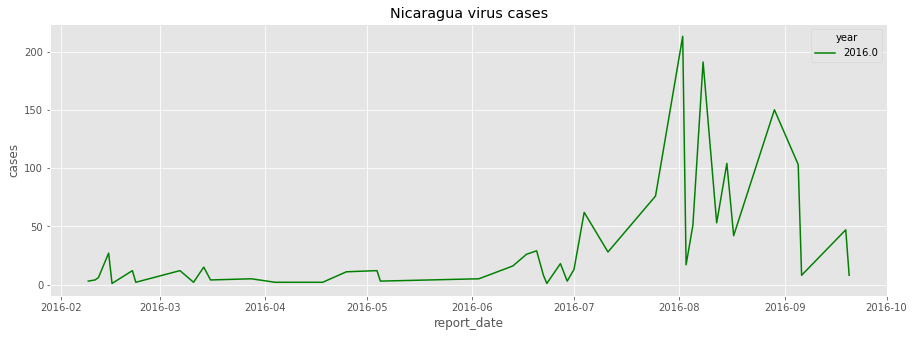

In [143]:
plt.figure(figsize=(15,5))
sns.lineplot(x='report_date', y='cases', hue='year',data=nicaraguaCases,palette=['green'])
plt.title('Nicaragua virus cases')
plt.show()

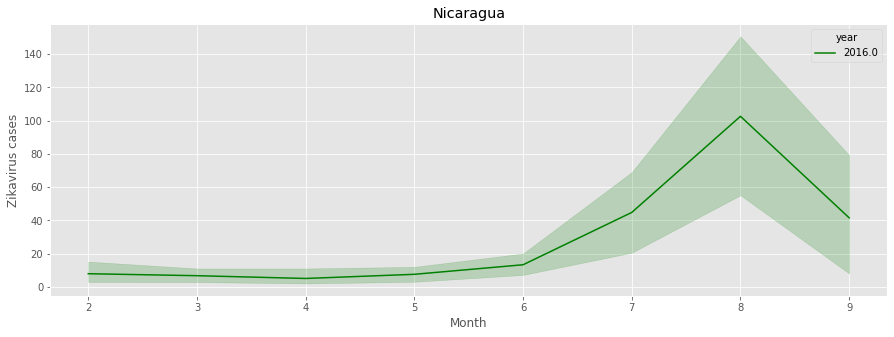

In [145]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='cases', hue='year',data=nicaraguaCases, palette=['green'] )
plt.title('Nicaragua')
plt.xlabel('Month')
plt.ylabel('Zikavirus cases')
plt.show()

Let's analyse the confirmed cases of zika virus with three environmental factors such as max temperature, precipitation and humidity. And also considering the incubation period 3–14 days.

### 1.5 Analysis the weather of Nicaragua

In [146]:
nicaragua = nicaraguaCases.groupby(['report_date']).cases.agg([sum])
nicaragua = nicaragua.reset_index()
nicaragua

,report_date,sum
0,2016-02-09,3
1,2016-02-11,4
2,2016-02-12,6
3,2016-02-15,27
4,2016-02-16,1
5,2016-02-22,12
6,2016-02-23,2
7,2016-03-07,12
8,2016-03-11,4
9,2016-03-14,15


### 1.7 Nicaragua Weather

In [147]:
NicaraguaWeather = pd.read_csv('weatherdataset.csv')
NicaraguaWeather = NicaraguaWeather[NicaraguaWeather["location"].str.startswith("Nicaragua")]
NicaraguaWeather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
4648,2016-02-09,33,23,0.0,8.7,7,4,06:53 AM,07:05 PM,06:09 AM,05:50 PM,16,28,28,27,35,21,52,0.0,1014,33,10,65,26,Nicaragua
4649,2016-02-10,32,22,0.0,8.7,7,12,07:44 AM,08:03 PM,06:08 AM,05:50 PM,14,27,27,26,39,18,49,0.0,1015,32,10,60,29,Nicaragua
4650,2016-02-11,33,22,0.0,8.7,7,19,08:33 AM,09:01 PM,06:08 AM,05:51 PM,15,28,28,26,38,18,52,0.0,1014,33,10,66,29,Nicaragua
4651,2016-02-12,34,23,0.0,8.7,7,27,09:23 AM,09:59 PM,06:08 AM,05:51 PM,17,29,29,28,39,15,54,0.0,1013,34,10,65,29,Nicaragua
4652,2016-02-13,35,23,0.0,8.7,8,34,10:12 AM,10:56 PM,06:07 AM,05:51 PM,18,30,30,28,42,13,56,0.0,1012,35,10,60,31,Nicaragua


In [148]:
# Convert our report_date columns to datetime datatype
NicaraguaWeather['date_time'] = pd.to_datetime(NicaraguaWeather['date_time'], format="%Y-%m-%d")

# create new year and month column from datetime
NicaraguaWeather['year'] = pd.DatetimeIndex(NicaraguaWeather['date_time']).year
NicaraguaWeather['month'] = pd.DatetimeIndex(NicaraguaWeather['date_time']).month

### Case 1
* Report date - 2016-02-15 = 27
* weather date - 2016-02-09 to 	2016-02-15

Text(0.5, 1.0, 'Humidity')

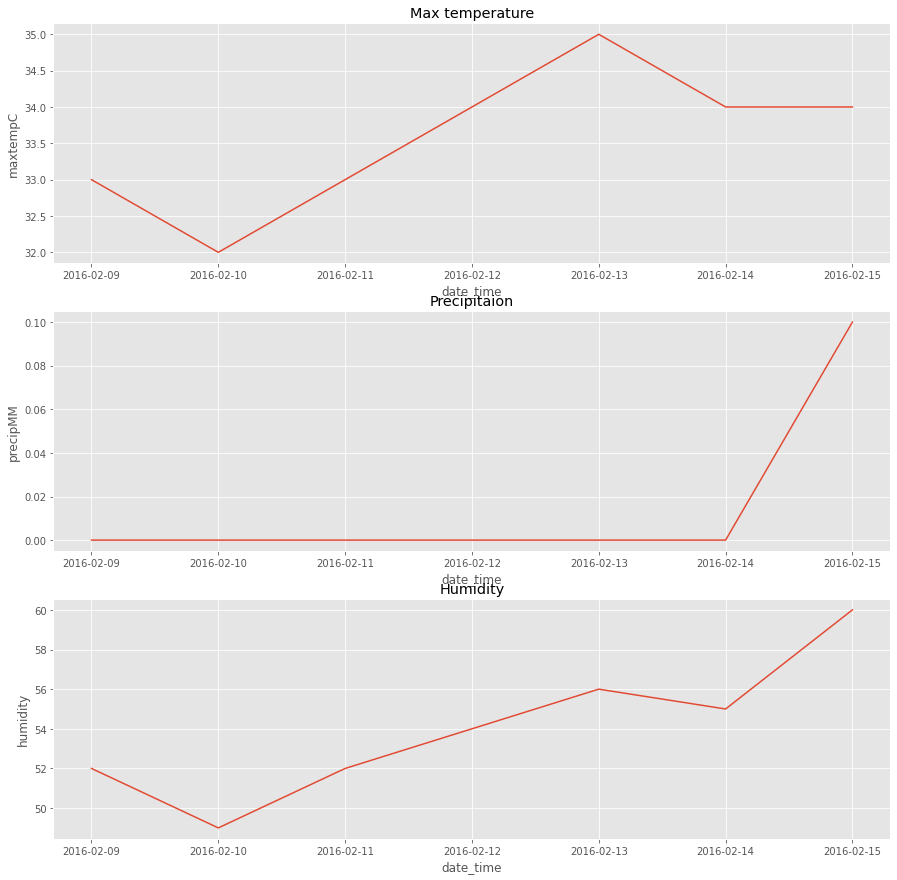

In [149]:
nica_case1 = NicaraguaWeather.loc[(NicaraguaWeather['date_time'] >= '2016-02-09 ') & (NicaraguaWeather['date_time'] <= ' 2016-02-15')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=nica_case1)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=nica_case1)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=nica_case1)
axes[2].set_title('Humidity')

### Case 2
* Report date - 2016-06-23 = 1
* weather date - 2016-06-09  to 2016-06-23

Text(0.5, 1.0, 'Humidity')

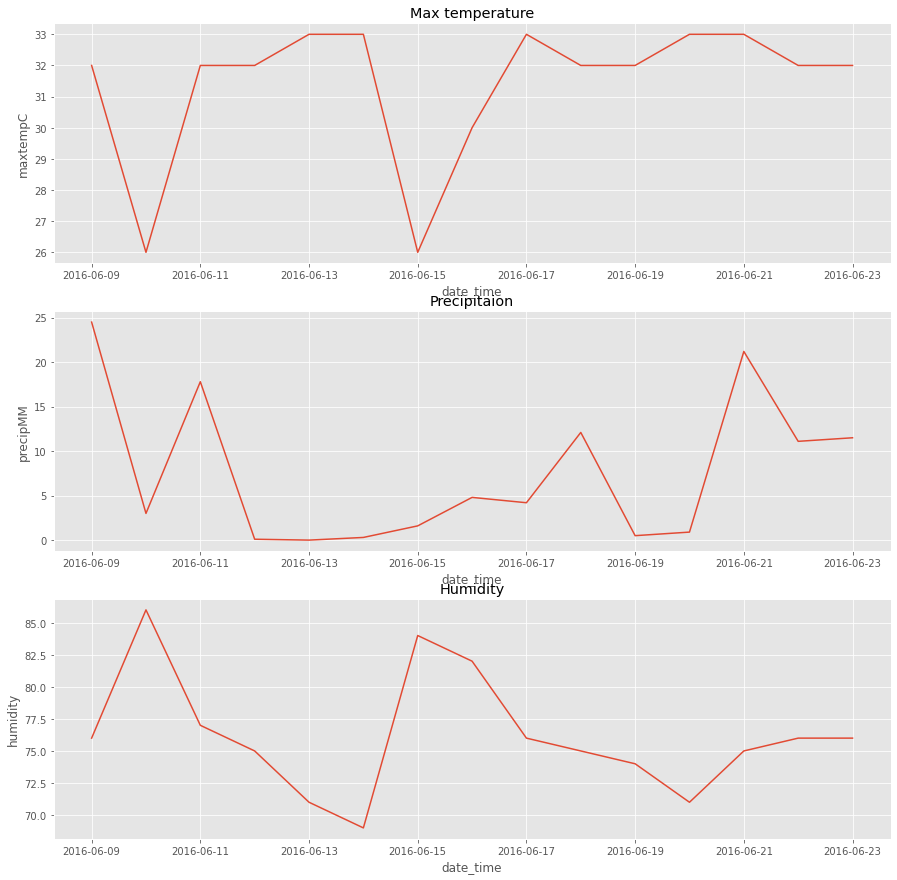

In [150]:
nica_case2 = NicaraguaWeather.loc[(NicaraguaWeather['date_time'] >= '2016-06-09') & (NicaraguaWeather['date_time'] <= '2016-06-23')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=nica_case2)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=nica_case2)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=nica_case2)
axes[2].set_title('Humidity')

### Case 3
* Report date - 2016-08-02 = 213
* weather date - 2016-07-19  to 2016-08-02

Text(0.5, 1.0, 'Humidity')

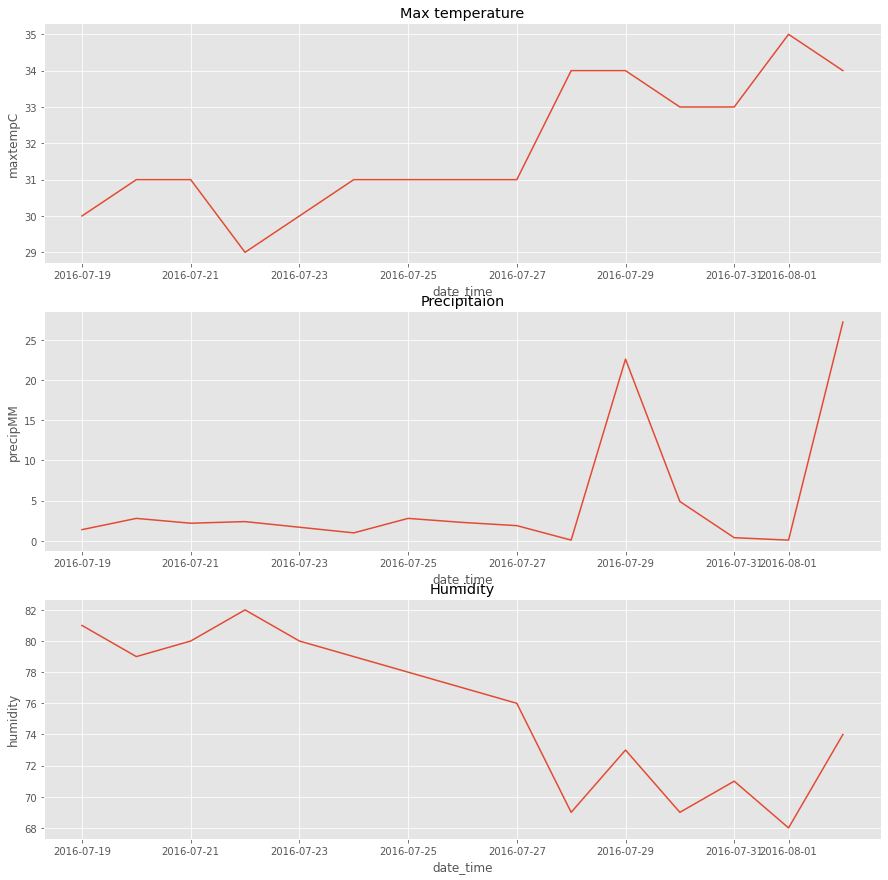

In [151]:
nica_case3 = NicaraguaWeather.loc[(NicaraguaWeather['date_time'] >= '2016-07-19') & (NicaraguaWeather['date_time'] <= '2016-08-02')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=nica_case3)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=nica_case3)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=nica_case3)
axes[2].set_title('Humidity')

Text(0.5, 1.0, 'Humidity')

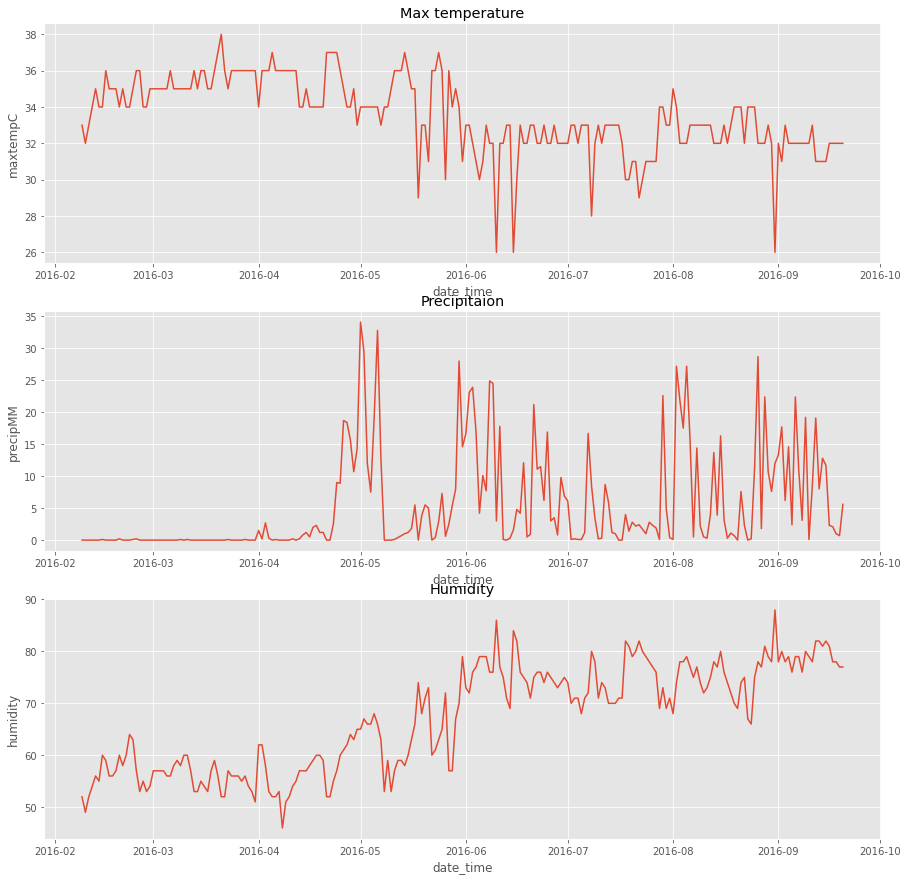

In [152]:
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=NicaraguaWeather)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=NicaraguaWeather)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=NicaraguaWeather)
axes[2].set_title('Humidity')

In [154]:
nicaragua_cases = nicaragua.rename(columns={"report_date": "date_time"})
NicaraguaWeather = NicaraguaWeather[['date_time','maxtempC','precipMM','humidity']]
nicaragua_case = pd.merge(nicaragua_cases,NicaraguaWeather, on=['date_time'], how='left') 
nicaragua_case.head()

,date_time,sum,maxtempC,precipMM,humidity
0,2016-02-09,3,33,0.0,52
1,2016-02-11,4,33,0.0,52
2,2016-02-12,6,34,0.0,54
3,2016-02-15,27,34,0.1,60
4,2016-02-16,1,36,0.0,59


Text(0.5, 1.0, 'Humidity')

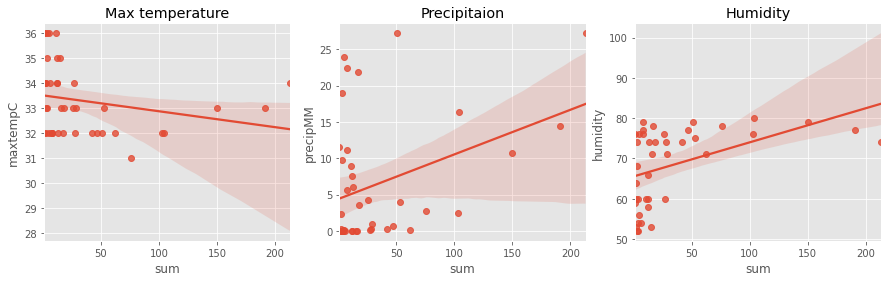

In [155]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.regplot(ax=axes[0],y=nicaragua_case['maxtempC'], x=nicaragua_case['sum'])
axes[0].set_title('Max temperature')
sns.regplot(ax=axes[1],y=nicaragua_case['precipMM'], x=nicaragua_case['sum'])
axes[1].set_title('Precipitaion')
sns.regplot(ax=axes[2],y=nicaragua_case['humidity'], x=nicaragua_case['sum'])
axes[2].set_title('Humidity')

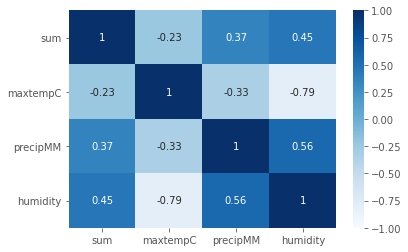

In [156]:
sns.heatmap(nicaragua_case.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1) 